In [23]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import glob
import utils
import matplotlib.colors as colors
import cmaps

# Read return files

In [24]:
datadir='/data/ghervieux/AFI'
method='Weibull'
file=f'{datadir}/afi_return.fullUSA.weibull.nc'


In [25]:
ds=xr.open_dataset(file)
units='degree-days ("°F")'

In [26]:
ds['return_afi']

<xarray.DataArray 'return_afi' (return_periods: 6, lat: 193, lon: 501)> Size: 5MB
[580158 values with dtype=float64]
Coordinates:
  * return_periods  (return_periods) int64 48B 2 5 10 25 50 100
  * lat             (lat) float64 2kB 72.0 71.75 71.5 71.25 ... 24.5 24.25 24.0
  * lon             (lon) float64 4kB 180.0 180.2 180.5 ... 304.5 304.8 305.0

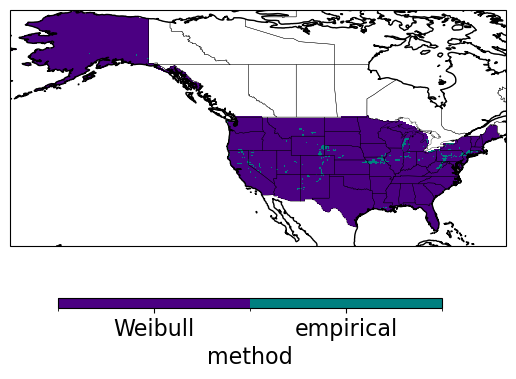

In [27]:
# choose a good projection for regional maps
levels=np.array([1,2,3])
pal_norm = colors.BoundaryNorm(np.array([1,2,3]),ncolors=3, clip = False)
cmap= colors.ListedColormap(['indigo','sienna', 'teal'])
proj=ccrs.PlateCarree()
#proj=ccrs.LambertConformal()
fig, ax = plt.subplots(nrows=1,ncols=1,subplot_kw={'projection':proj})
cc=ds['method'].plot.pcolormesh(ax=ax,cmap = cmap, levels=levels, transform=proj,add_colorbar=False)

state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='None')
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.25)
cbar_ax = fig.add_axes([0.2, 0.12, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=cbar_ax,orientation='horizontal',ticks=[1.5,2.5])
cbar.set_ticklabels(['Weibull','empirical'],fontsize=14)
cbar.set_label(label=f'method',fontsize=16)
cbar.ax.tick_params(labelsize=16)
ax.set_extent([190,294,22,62])
ax.coastlines()

In [28]:
state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='None')

In [29]:
lon2d,lat2d=np.meshgrid(ds.lon,ds.lat)
idlat,idlon = np.where(ds['method']==2)

Text(0.5, 0.98, 'method: Weibull, return period= 2')

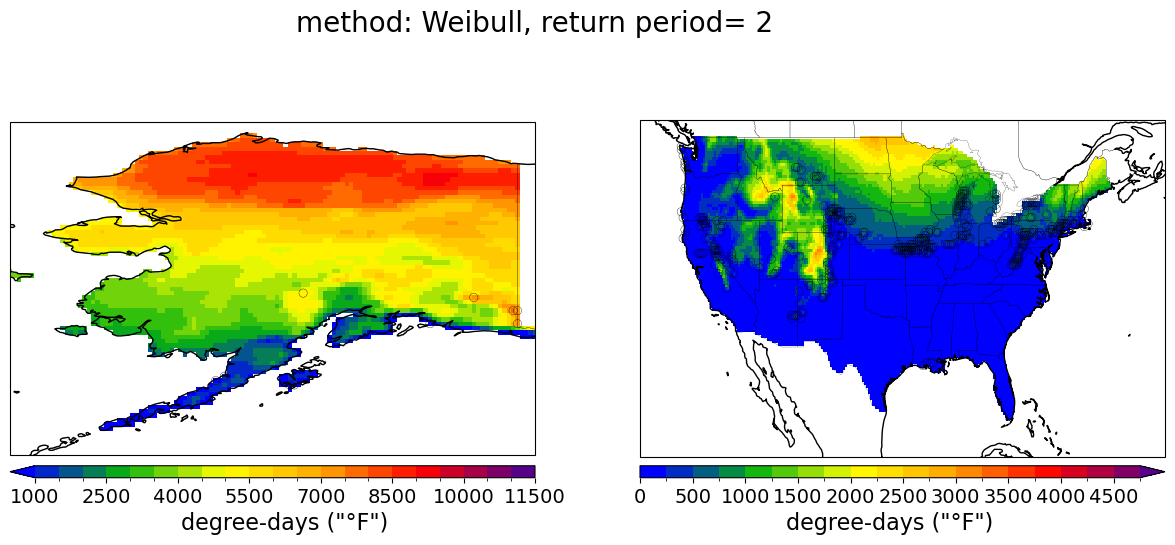

In [30]:
cmap=cmaps.BlGrYeOrReVi200
proj=ccrs.PlateCarree()

nperiod=2
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)
cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax[0],cmap=cmap,levels=np.arange(1000,12000,500),add_colorbar=False)
ax[0].scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.25,zorder=10)
p0 = ax[0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax[0].set_extent([190,220,53,72],ccrs.PlateCarree())

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax[1],cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
ax[1].scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.25,zorder=10)
p0 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax[1].set_extent([230,300,22,50.5],ccrs.PlateCarree())


asp = np.diff(ax[0].get_xlim())[0] / np.diff(ax[0].get_ylim())[0]
ax[1].set_aspect(asp)

for i in range(len(ax)):
  ax[i].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
  ax[i].coastlines()
  ax[i].set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}',fontsize=20)  

Text(0.5, 0.98, 'method: Weibull, return period= 2')

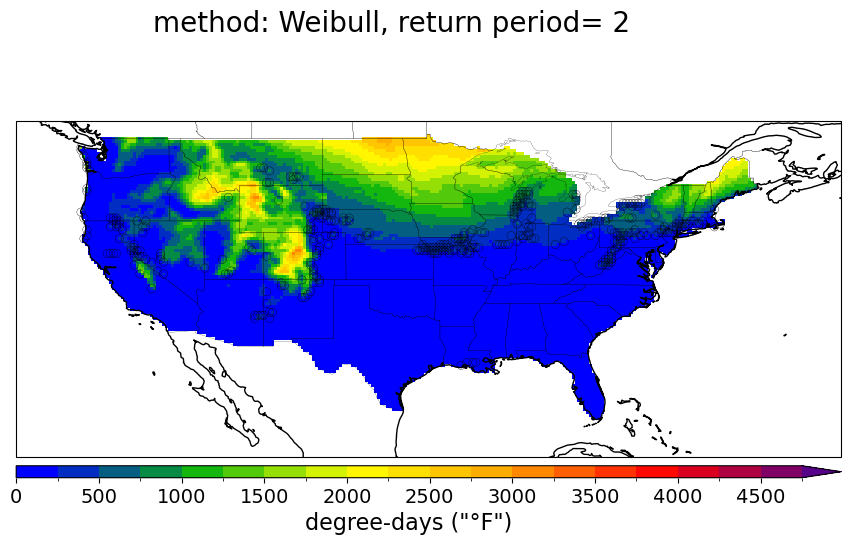

In [31]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)


cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax,cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
ax.scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.25,zorder=10)
p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax.set_extent([230,300,22,50.5],ccrs.PlateCarree())

ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
ax.coastlines()
ax.set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}',fontsize=20)  

Text(0.5, 0.98, 'method: Weibull, return period= 2')

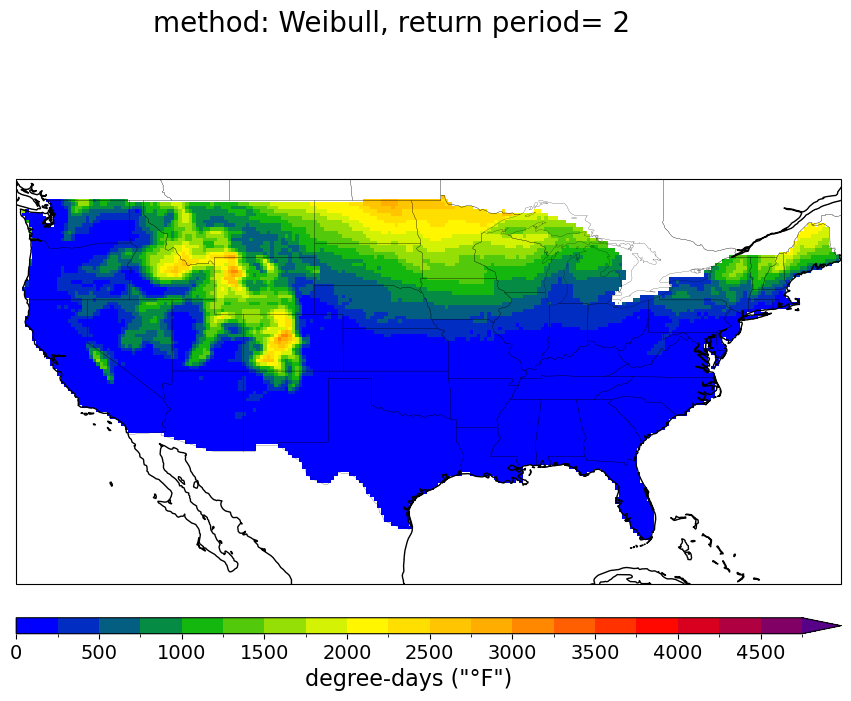

In [32]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax,cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)

p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax.set_extent([235,293,22,50.5],ccrs.PlateCarree())
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
ax.coastlines()
ax.set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}',fontsize=20)  

Text(0.5, 0.98, 'method: Weibull, return period= 50')

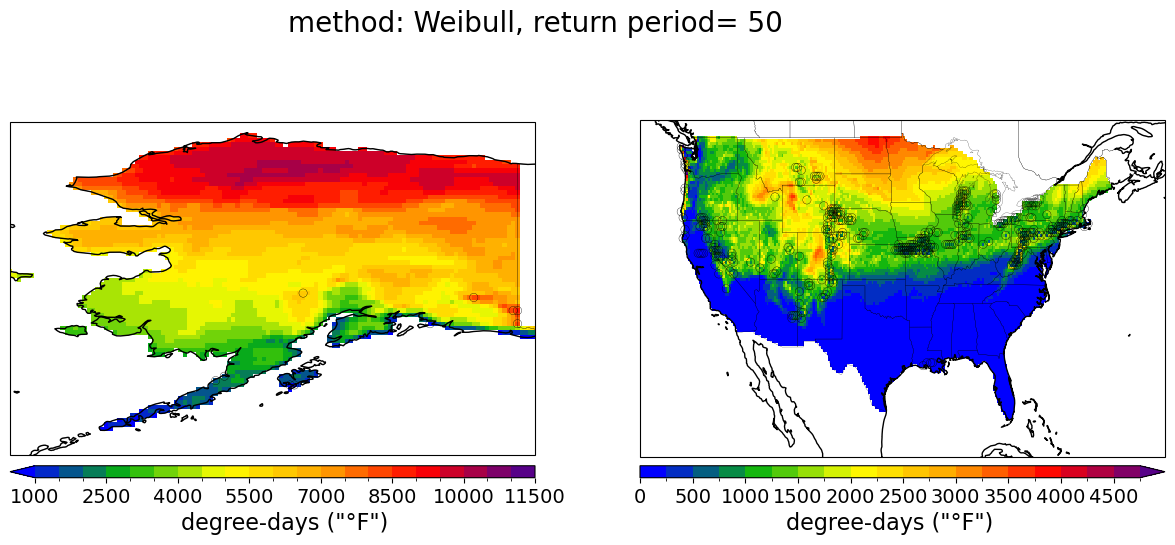

In [33]:
nperiod=50
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)
cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax[0],cmap=cmap,levels=np.arange(1000,12000,500),add_colorbar=False)
ax[0].scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.25,zorder=10)
p0 = ax[0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax[0].set_extent([190,220,53,72],ccrs.PlateCarree())

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax[1],cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
ax[1].scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.25,zorder=10)
p0 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax[1].set_extent([230,300,22,50.5],ccrs.PlateCarree())


asp = np.diff(ax[0].get_xlim())[0] / np.diff(ax[0].get_ylim())[0]
ax[1].set_aspect(asp)

for i in range(len(ax)):
  ax[i].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
  ax[i].coastlines()
  ax[i].set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}',fontsize=20)  

Text(0.5, 0.98, 'method: Weibull, return period= 50')

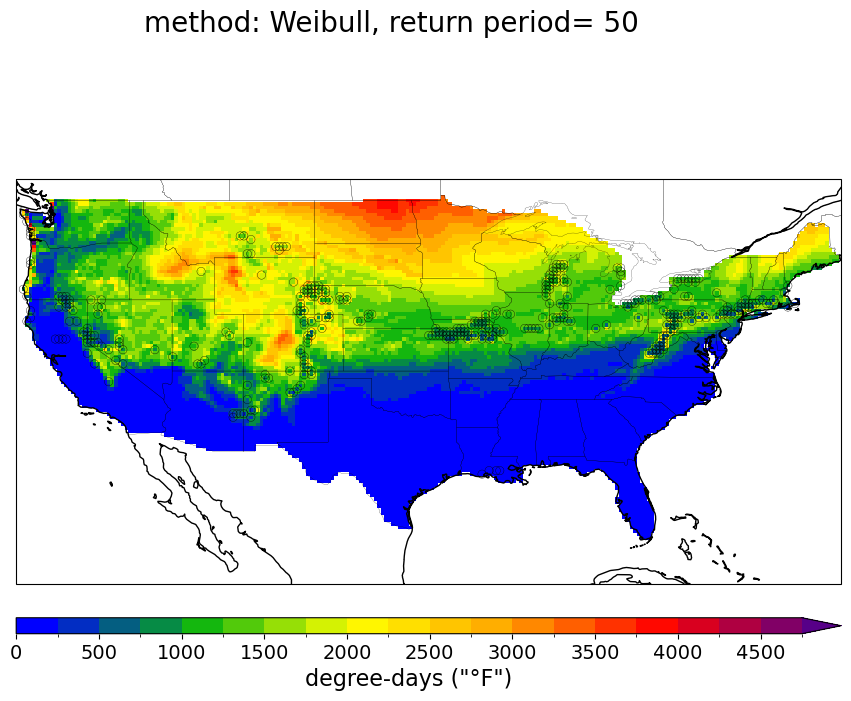

In [34]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax,cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
ax.scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.25,zorder=10)
p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax.set_extent([235,293,22,50.5],ccrs.PlateCarree())
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
ax.coastlines()
ax.set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}',fontsize=20)  

Text(0.5, 0.98, 'method: Weibull, return period= 50')

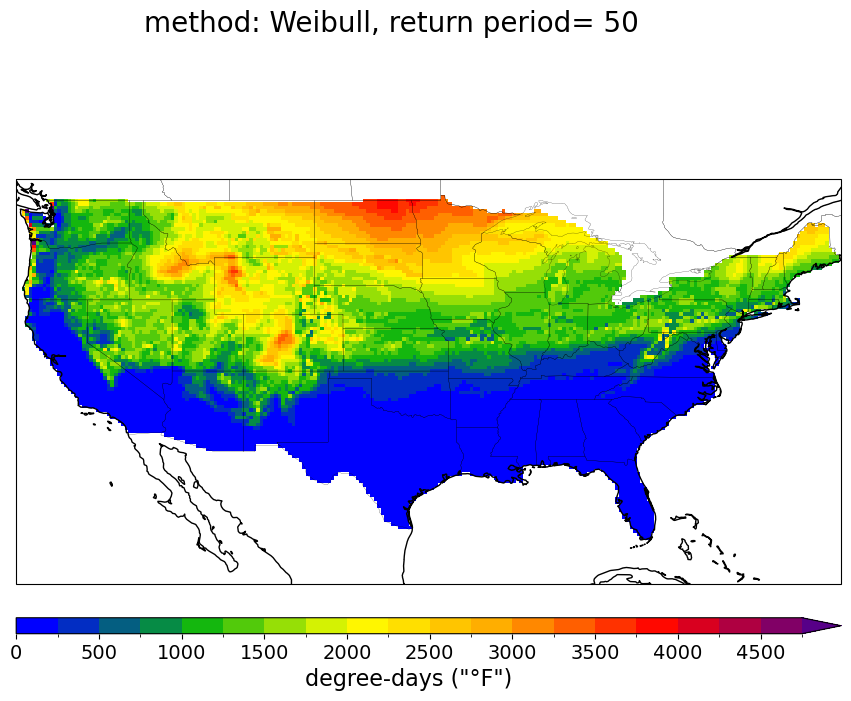

In [35]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax,cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)

p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax.set_extent([235,293,22,50.5],ccrs.PlateCarree())
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
ax.coastlines()
ax.set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}',fontsize=20)  

Text(0.5, 0.98, 'method: Weibull, return period= 100')

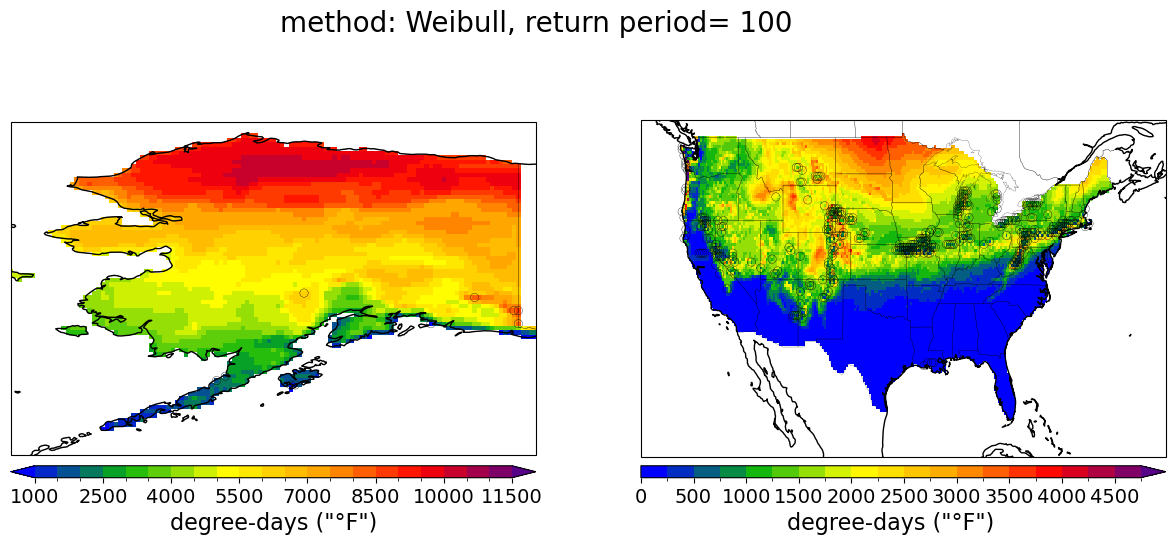

In [36]:
nperiod=100

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)
cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax[0],cmap=cmap,levels=np.arange(1000,12000,500),add_colorbar=False)
ax[0].scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.25,zorder=10)
p0 = ax[0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax[0].set_extent([190,220,53,72],ccrs.PlateCarree())

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax[1],cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
ax[1].scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.25,zorder=10)
p0 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax[1].set_extent([230,300,22,50.5],ccrs.PlateCarree())


asp = np.diff(ax[0].get_xlim())[0] / np.diff(ax[0].get_ylim())[0]
ax[1].set_aspect(asp)

for i in range(len(ax)):
  ax[i].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
  ax[i].coastlines()
  ax[i].set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}',fontsize=20)  

Text(0.5, 0.98, 'method: Weibull, return period= 100')

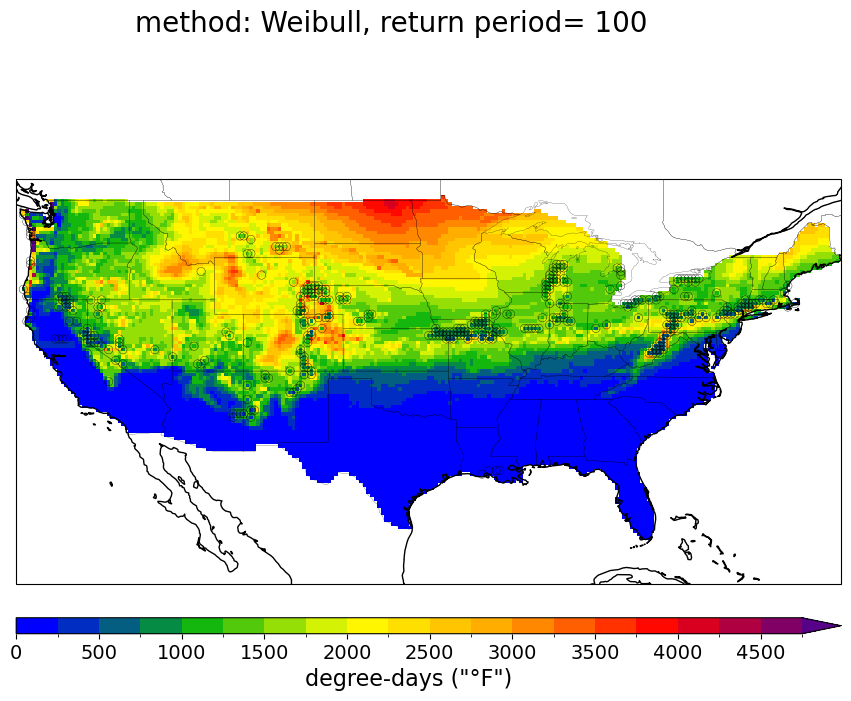

In [37]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax,cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
ax.scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.25,zorder=10)
p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax.set_extent([235,293,22,50.5],ccrs.PlateCarree())
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
ax.coastlines()
ax.set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}',fontsize=20)  

Text(0.5, 0.98, 'method: Weibull, return period= 100')

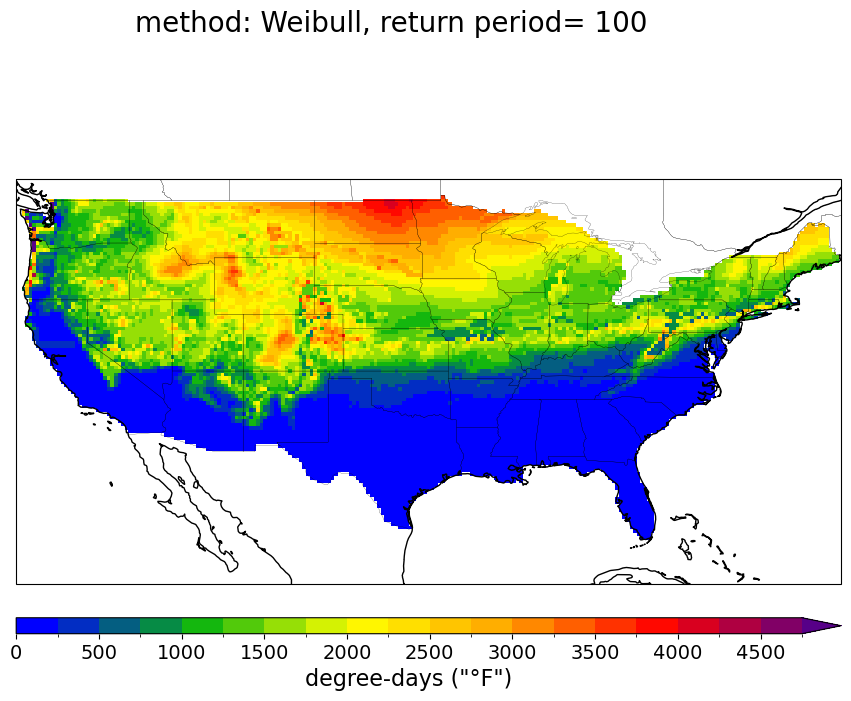

In [38]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax,cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)

p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax.set_extent([235,293,22,50.5],ccrs.PlateCarree())
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
ax.coastlines()
ax.set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}',fontsize=20)  